<a href="https://colab.research.google.com/github/cricci3/Salaries_clustering/blob/main/Project2_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''
Data Analytics
Assignment 2 - Group 2
Salaries (clustering)

Students: Pernille Bergesen (pernille.bergesen@usi.ch) and Claudio Ricci (riccicl@usi.ch)
'''

'\nData Analytics\nAssignment 2 - Group 2\nSalaries (clustering)\n\nStudents: Pernille Bergesen (pernille.bergesen@usi.ch) and Claudio Ricci (riccicl@usi.ch)\n'

In [3]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#loading the data from the san-francisco datasets
dataset_file_2011 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2011.csv'
dataset_file_2012 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2012.csv'
dataset_file_2013 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2013.csv'
dataset_file_2014 = '/content/drive/MyDrive/DataAnalytics_02_Salaries/san-francisco-2014.csv'

#just for testing:
#printing first two lines of 2011 dataset

df_2011 = pd.read_csv(dataset_file_2011)
df_2012 = pd.read_csv(dataset_file_2012)
df_2013 = pd.read_csv(dataset_file_2013)
df_2014 = pd.read_csv(dataset_file_2014)


print("san-francisco-2011.csv: ")
df_2011.head(2)

san-francisco-2011.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,Not Provided,567595.43,567595.43,2011,NaN,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,San Francisco


In [5]:
#printing first two lines of 2012 dataset
print("san-francisco-2012.csv: ")
df_2012.head(2)

san-francisco-2012.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco
1,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco


In [6]:
#printing first two lines of 2013 dataset
print("san-francisco-2013.csv: ")
df_2013.head(2)

san-francisco-2013.csv: 


,employee_name,job_title,base_pay,overtime_pay,other_pay,total_benefits,total_pay,total_pay_benefits,year,notes,jurisdiction_name
0,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco
1,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.0,23236.00,85431.39,336922.01,422353.40,2013,NaN,San Francisco


In [7]:
#printing first two lines of 2014 dataset
print("san-francisco-2014.csv: ")
df_2014.head(2)

san-francisco-2014.csv: 


,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
0,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
1,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT


In [8]:
df_2011.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [9]:
df_2012.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [10]:
df_2013.columns

Index(['employee_name', 'job_title', 'base_pay', 'overtime_pay', 'other_pay',
       'total_benefits', 'total_pay', 'total_pay_benefits', 'year', 'notes',
       'jurisdiction_name'],
      dtype='object')

In [11]:
df_2014.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status'],
      dtype='object')

df2011/12/14 have column Agency while df2013 has column jurisdiction_name but both have just a class inside, 'San Francisco' -> I will rename 'jurisdiction_name' in 'Agency'

In [12]:
df_2011['Agency'].unique()
df_2012['Agency'].unique()
df_2013['jurisdiction_name'].unique()
df_2014['Agency'].unique()

array(['San Francisco'], dtype=object)

In [13]:
df_2013.rename(columns={'jurisdiction_name': 'Agency'}, inplace=True)

# others rename
df_2013.rename(columns={'employee_name' : 'Employee Name',
                        'job_title' : 'Job Title',
                        'base_pay' : 'Base Pay',
                        'overtime_pay' : 'Overtime Pay',
                        'other_pay' : 'Other Pay',
                        'total_benefits' : 'Benefits',
                        'total_pay' : 'Total Pay',
                        'total_pay_benefits' : 'Total Pay & Benefits',
                        'year' : 'Year',
                        'notes' : 'Notes'}, inplace=True)

In [14]:
df_2013.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [15]:
# Df_2014 has also status : Part-time / Full-time / nan -> I will delete it so we can merge the four datasets
df_2014['Status'].unique()

array(['PT', 'FT', nan], dtype=object)

In [16]:
df_2014.drop(columns=['Status'], inplace=True)

In [17]:
df_2014.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency'],
      dtype='object')

In [18]:
df_2014['Year'].unique()

array([2014])

In [19]:
df = pd.concat([df_2011, df_2012, df_2013, df_2014])

In [20]:
df.head(5)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011,NaN,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011,NaN,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011,NaN,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011,NaN,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011,NaN,San Francisco


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148654 entries, 0 to 38122
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Employee Name         148654 non-null  object 
 1   Job Title             148654 non-null  object 
 2   Base Pay              148049 non-null  object 
 3   Overtime Pay          148654 non-null  object 
 4   Other Pay             148654 non-null  object 
 5   Benefits              148654 non-null  object 
 6   Total Pay             148654 non-null  float64
 7   Total Pay & Benefits  148654 non-null  float64
 8   Year                  148654 non-null  int64  
 9   Notes                 0 non-null       float64
 10  Agency                148654 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 13.6+ MB


In [22]:
print(f"Number of NaN values before manipulations: {df.isnull().sum()}")

Number of NaN values before manipulations: Employee Name                0
Job Title                    0
Base Pay                   605
Overtime Pay                 0
Other Pay                    0
Benefits                     0
Total Pay                    0
Total Pay & Benefits         0
Year                         0
Notes                   148654
Agency                       0
dtype: int64


In [23]:
# Notes columns is full of null values -> drop
df.drop(columns=['Notes'], inplace=True)

In [24]:
# I will also remove Name (useless)
df.drop(columns=['Employee Name'], inplace=True)

In [25]:
# Convert different Pays to numeric, coercing non-numeric values to NaN
df['Overtime Pay'] = pd.to_numeric(df['Overtime Pay'], errors='coerce')
df['Other Pay'] = pd.to_numeric(df['Other Pay'], errors='coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'], errors='coerce')
df['Base Pay'] = pd.to_numeric(df['Base Pay'], errors='coerce')

In [26]:
# Check how many NaNs we have now
print(f"Number of NaN values after change in numeric: {df.isnull().sum()}")

# Now fill NaN values with median
df['Base Pay'].fillna(df['Base Pay'].median(), inplace=True)
df['Overtime Pay'].fillna(df['Overtime Pay'].median(), inplace=True)
df['Other Pay'].fillna(df['Other Pay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

# Verify all NaNs are gone
print(f"Number of NaN values after manipulations: {df.isnull().sum()}")

Number of NaN values after change in numeric: Job Title                   0
Base Pay                  609
Overtime Pay                4
Other Pay                   4
Benefits                36163
Total Pay                   0
Total Pay & Benefits        0
Year                        0
Agency                      0
dtype: int64
Number of NaN values after manipulations: Job Title               0
Base Pay                0
Overtime Pay            0
Other Pay               0
Benefits                0
Total Pay               0
Total Pay & Benefits    0
Year                    0
Agency                  0
dtype: int64


In [27]:
df.isnull().sum()

,0
Job Title,0
Base Pay,0
Overtime Pay,0
Other Pay,0
Benefits,0
Total Pay,0
Total Pay & Benefits,0
Year,0
Agency,0


# Clustering for the jobs

We chose to cluster for the jobs based on salaries and benefits.


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

In [29]:
seed = 0
np.random.seed(seed)

#checking if any Benefits values are negative
print(f"Jobs with negative values in the 'Benefits' column:")
df[df['Benefits'] < 0]

Jobs with negative values in the 'Benefits' column:


,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Agency
37603,Police Officer 3,65007.45,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
37604,Police Officer 3,65007.45,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco
37605,Police Officer 3,65007.45,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
33568,Secretary 2,0.00,0.0,9991.77,-13.80,9991.77,9977.97,2014,San Francisco


In [30]:
#since there are 4 jobs with Benefits value of less than 0, these will be avoided in the clustering graphs
#df['Benefits'] = df['Benefits'].clip(lower=0)
df = df.copy()
df['Benefits'] = df['Benefits'].clip(lower=0)

print(df[df['Benefits'] < 0])

Empty DataFrame
Columns: [Job Title, Base Pay, Overtime Pay, Other Pay, Benefits, Total Pay, Total Pay & Benefits, Year, Agency]
Index: []


In [31]:
#selecting the columns relevant for the jobs based on their various attributes such as Base Pay, Overtime Pay, Other Pay, Benefits, Total Pay, Total Pay & Benefits
column_features = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']
jobs = df[column_features].copy()
scaler = StandardScaler()
jobs_scaled = scaler.fit_transform(jobs)

### 1.1 K-Means clustering

In [32]:
#K-Means algorithm clustering for 6 columns ('Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits')
kmeans = KMeans(6, random_state=seed)
cluster_jobs = kmeans.fit_predict(jobs_scaled)
df['clustering_kmeans'] = cluster_jobs

kmeans.cluster_centers_

array([[ 1.50253412e+00, -3.04081040e-01, -7.23920825e-02,
         1.13167762e+00,  1.19412832e+00,  1.25036355e+00],
       [-1.21209237e+00, -4.10861101e-01, -3.40152679e-01,
        -1.24630671e+00, -1.18533241e+00, -1.20489699e+00],
       [ 7.28428953e-03, -1.91346811e-01, -2.25136930e-01,
         1.92465090e-01, -6.78650307e-02, -3.95091733e-02],
       [ 8.03202116e-01,  8.71827704e-01,  1.09236781e+00,
         6.33116888e-01,  1.05556389e+00,  9.86245280e-01],
       [ 1.04815854e+00,  4.20297075e+00,  1.18962394e+00,
         8.95579683e-01,  2.03346881e+00,  1.86588909e+00],
       [ 1.30094937e-01,  4.15185891e-01,  1.14644480e+01,
        -2.14975054e-01,  2.01092577e+00,  1.57445575e+00]])

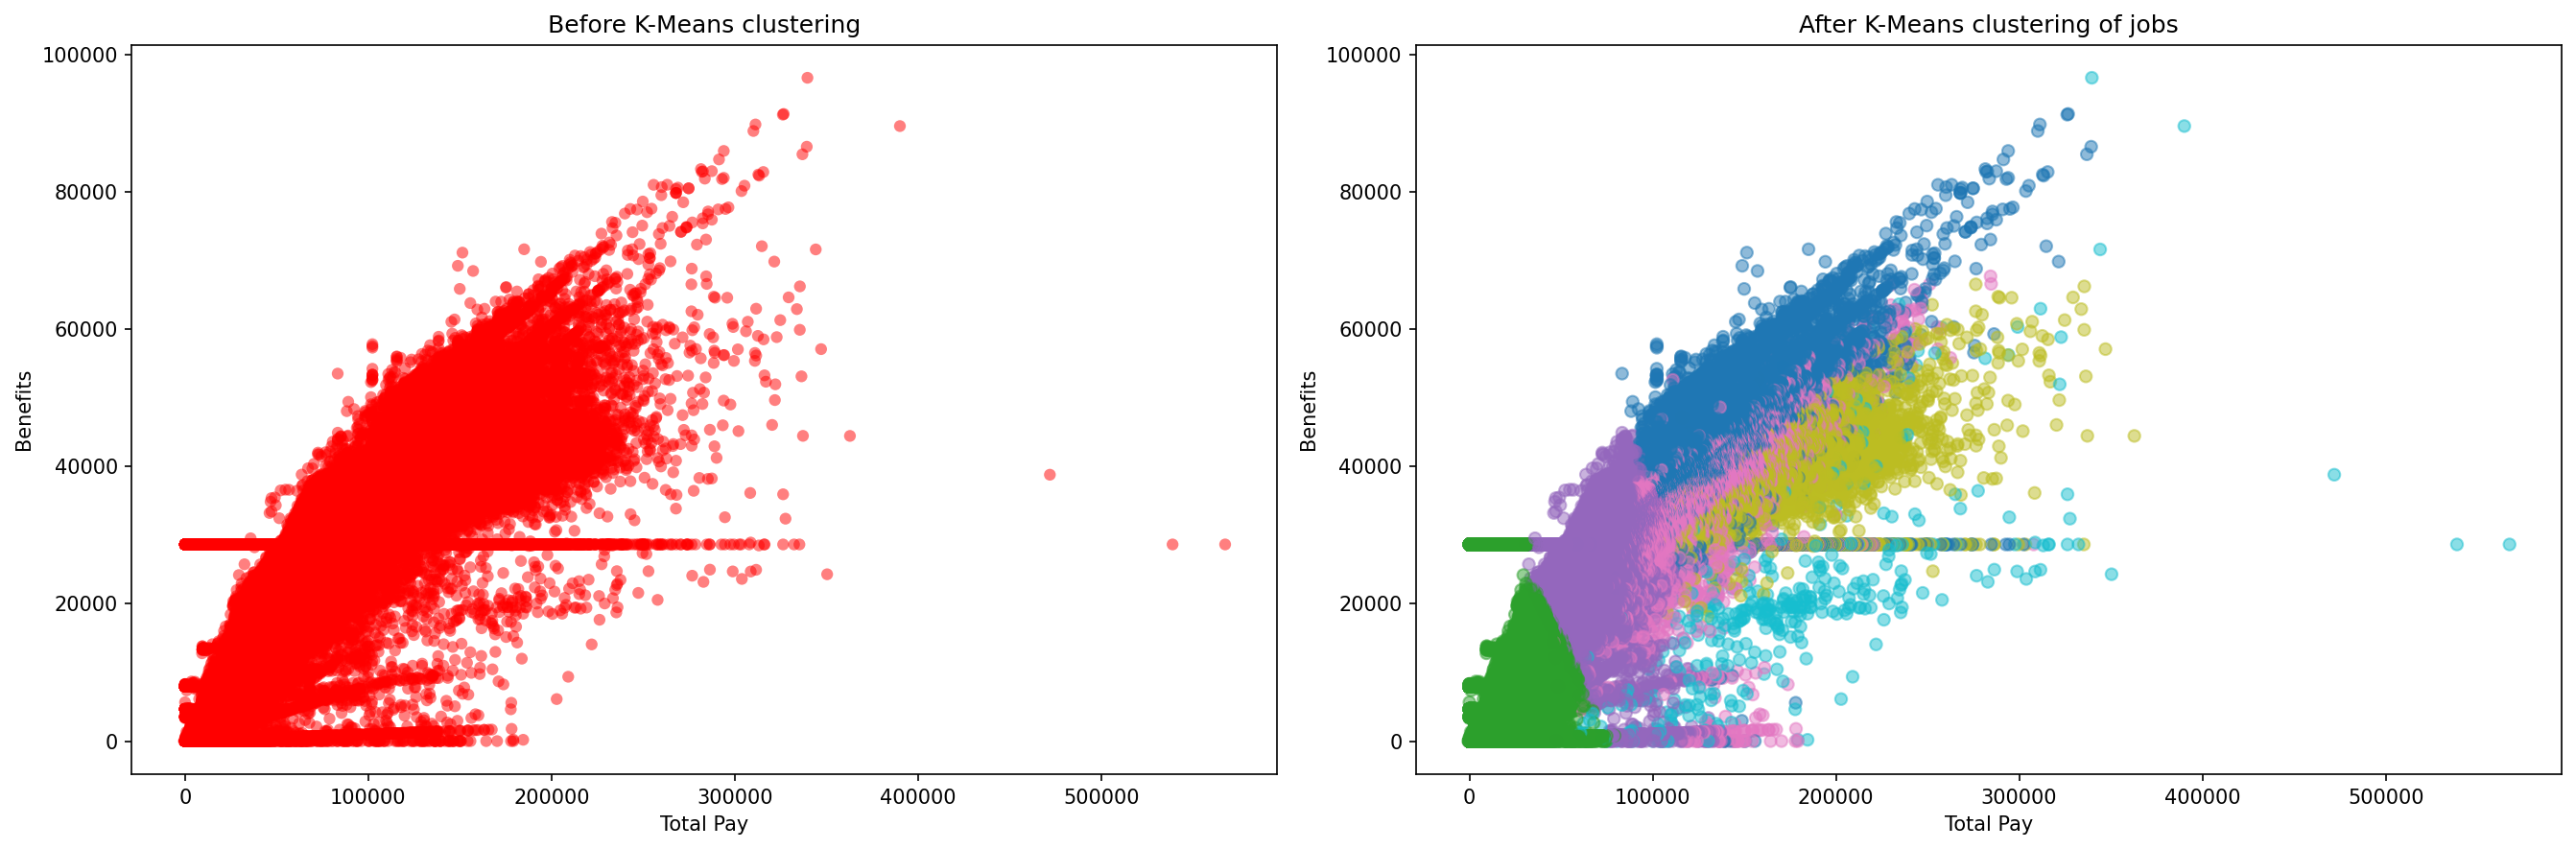

In [33]:
#for plotting in 2D, choosing just two of the columns to determine what are different categories of jobs based on salaries and benefits?
x_axis = 'Total Pay'
y_axis = 'Benefits'

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before K-Means clustering
ax[0].scatter(df[x_axis], df[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before K-Means clustering")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after K-Means clustering for jobs
ax[1].scatter(df[x_axis], df[y_axis], c=df['clustering_kmeans'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After K-Means clustering of jobs")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

In [34]:
#showing the 10 most frequent Benefit values and how often they appear to better understand the graphs above
df['Benefits'].value_counts().sort_values(ascending=False).head(10)

,count
Benefits,
28628.62,36164
0.00,1738
7959.18,348
4659.36,107
25699.20,83
37055.22,82
27052.98,75
37025.18,60
36097.33,57


In [35]:
df['clustering_kmeans'] = cluster_jobs

#finding the 7 most common job titles that appear to be grouped together within each cluster
most_job_title = (
    df.groupby('clustering_kmeans')['Job Title']
    .value_counts()
    .groupby(level=0)
    .head(7)
    .reset_index(name='Count')
)

#printing as a table
print(most_job_title.to_markdown(index=False))

|   clustering_kmeans | Job Title                          |   Count |
|--------------------:|:-----------------------------------|--------:|
|                   0 | Registered Nurse                   |    1671 |
|                   0 | Attorney (Civil/Criminal)          |     921 |
|                   0 | Police Officer 3                   |     852 |
|                   0 | Engineer                           |     435 |
|                   0 | Assoc Engineer                     |     427 |
|                   0 | Pr Administrative Analyst          |     366 |
|                   0 | Sergeant 3                         |     354 |
|                   1 | Special Nurse                      |    3649 |
|                   1 | Public Svc Aide-Public Works       |    2512 |
|                   1 | Recreation Leader                  |    1968 |
|                   1 | Transit Operator                   |    1564 |
|                   1 | Public Service Trainee             |    1281 |
|     

In [36]:
print(df.shape)

(148654, 10)


Code for limited number of rows (30000)

In [37]:
#only taking 30000 rows from the dataset to limit the RAM usage
df_limited = df.sample(n=30000, random_state=seed)

jobs_limited = df_limited[['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits']]
scaler_limited = StandardScaler()
jobs_scaled_limited = scaler.fit_transform(jobs_limited)

### 1.2 K-Means clustering for limited rows

Due to the spectral clustering running so very slowly and the Hierarchical with agglomerative clustering uses to much RAM, we had to use the algorithms with a limited number of rows to be able to compare the algorithm methods fairly.

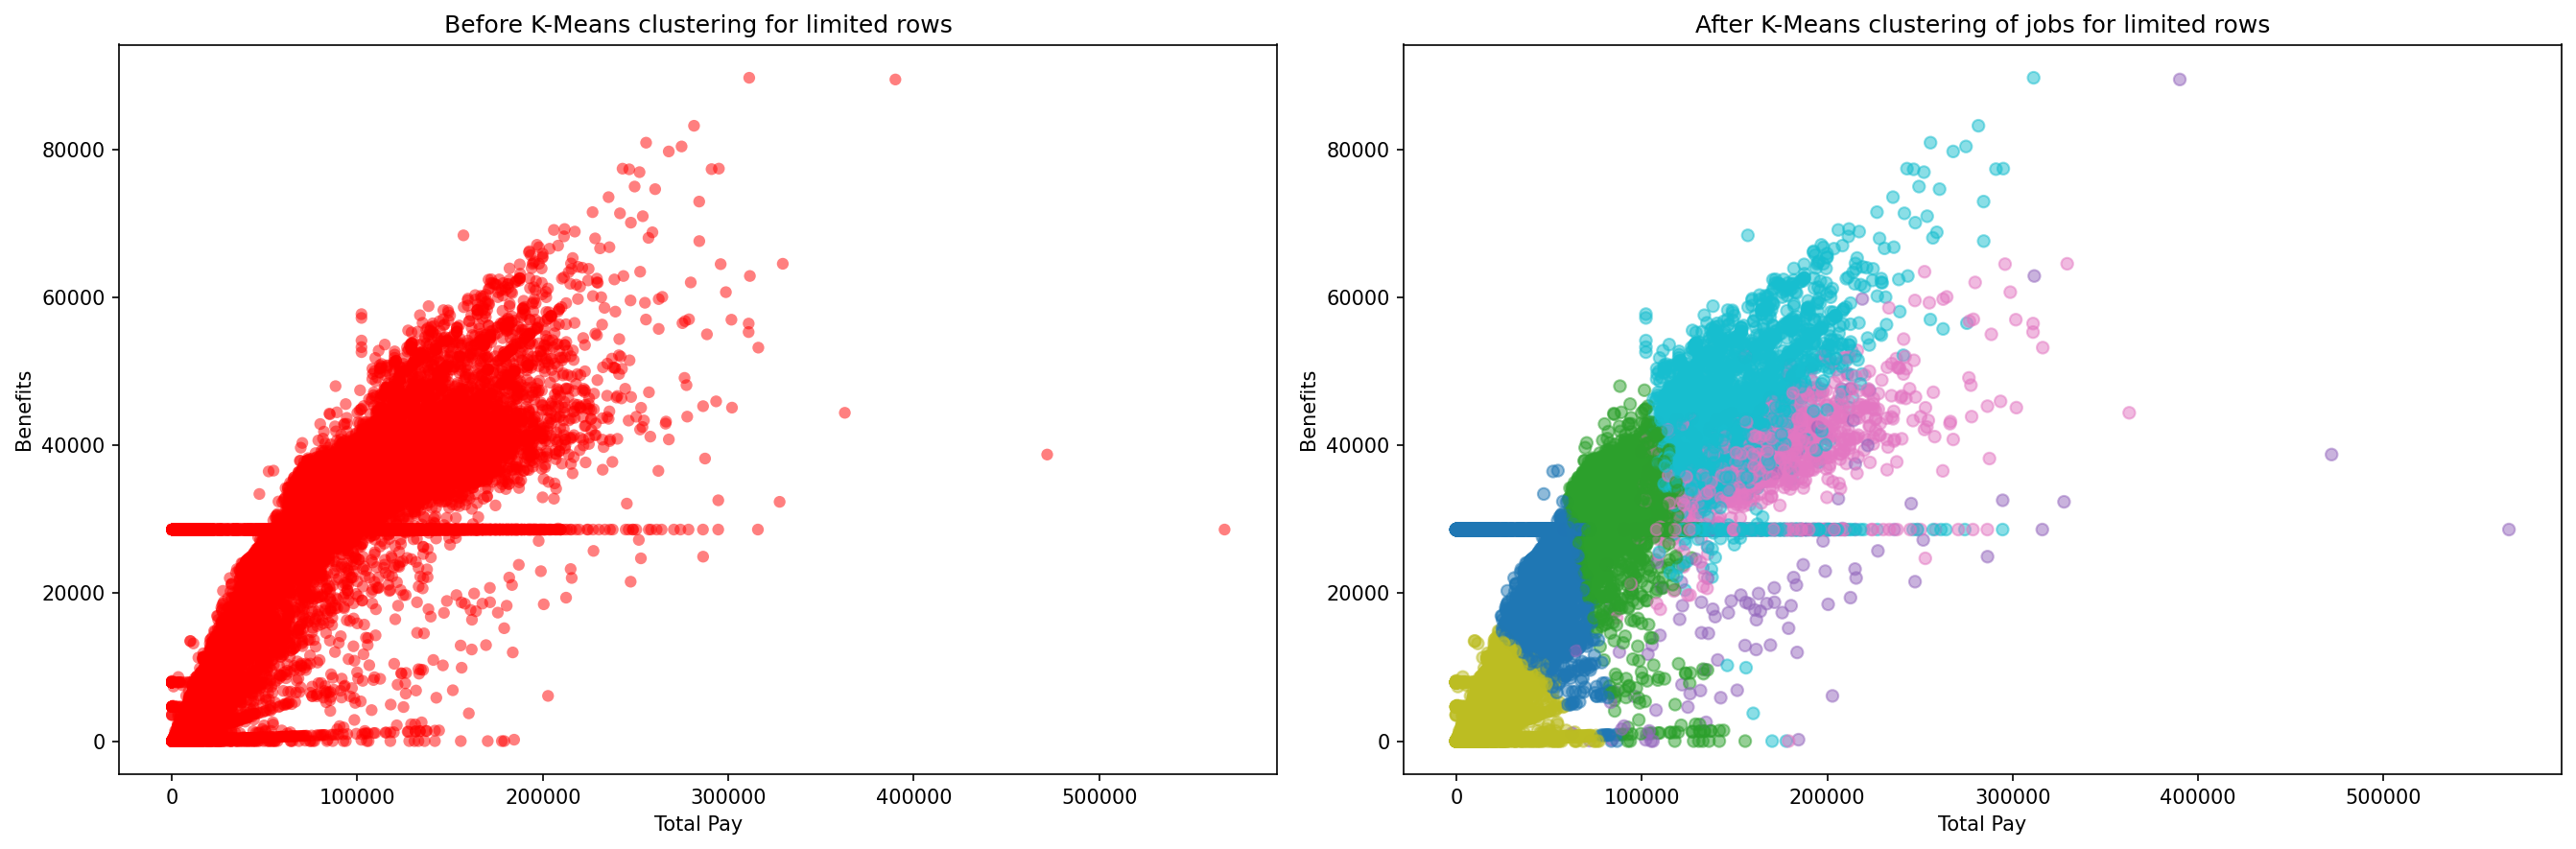

In [38]:
#K-Means for limited amount of rows
kmeans_limited = KMeans(6, random_state=seed)
df_limited['kmeans_limited'] = kmeans_limited.fit_predict(jobs_scaled_limited)

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before K-Means clustering
ax[0].scatter(df_limited[x_axis], df_limited[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before K-Means clustering for limited rows")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after K-Means clustering for jobs
ax[1].scatter(df_limited[x_axis], df_limited[y_axis], c=df_limited['kmeans_limited'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After K-Means clustering of jobs for limited rows")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

### 2.1 Spectral clustering for limited rows

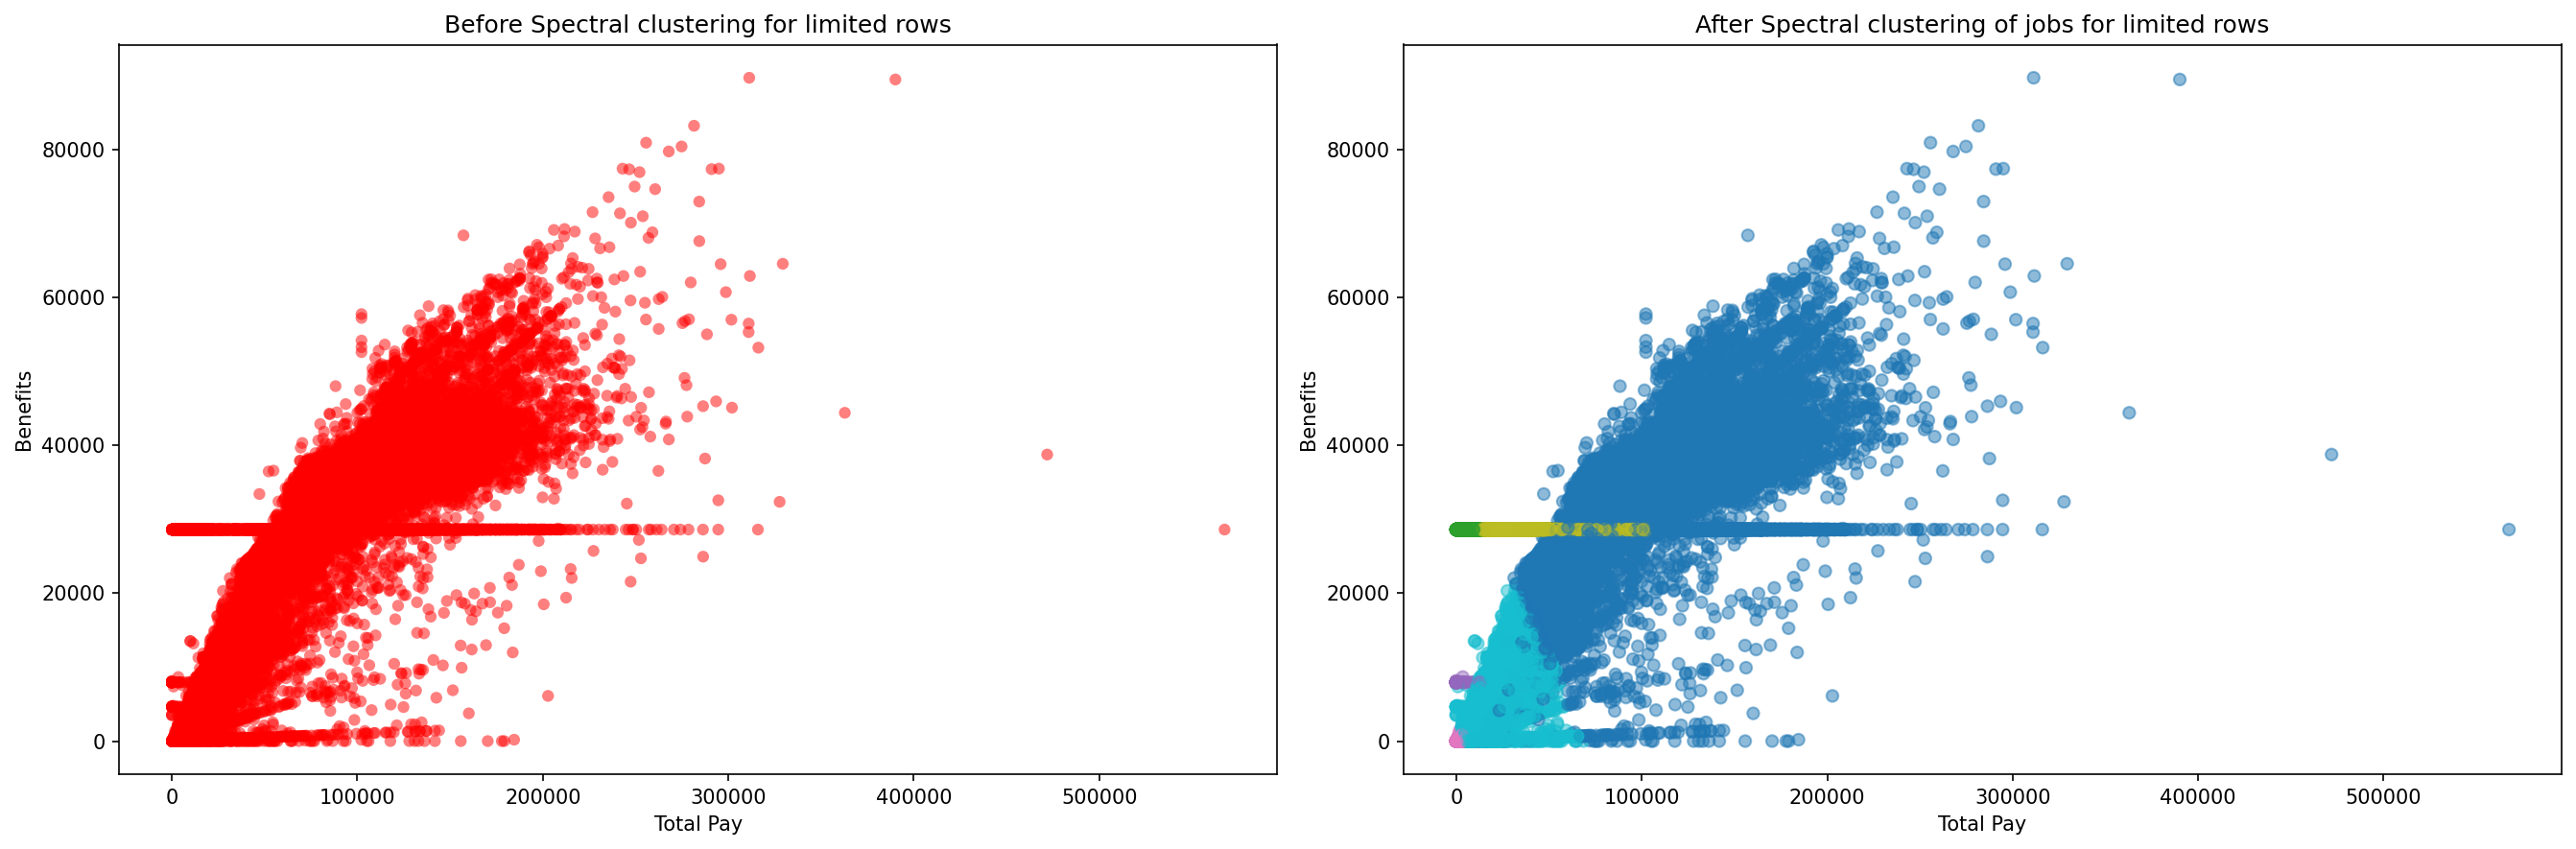

In [39]:
#Spectral clustering for limited rows (5000)
cluster_jobs_spectral_limited = SpectralClustering(6, affinity='nearest_neighbors', random_state=seed)
df_limited['cluster_jobs_spectral_limited'] = cluster_jobs_spectral_limited.fit_predict(jobs_scaled_limited)

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Spectral clustering
ax[0].scatter(df_limited[x_axis], df_limited[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Spectral clustering for limited rows")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Spectral clustering for jobs
ax[1].scatter(df_limited[x_axis], df_limited[y_axis], c=df_limited['cluster_jobs_spectral_limited'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Spectral clustering of jobs for limited rows")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

### 3.1 Hierarchical with agglomerative clustering for limited rows

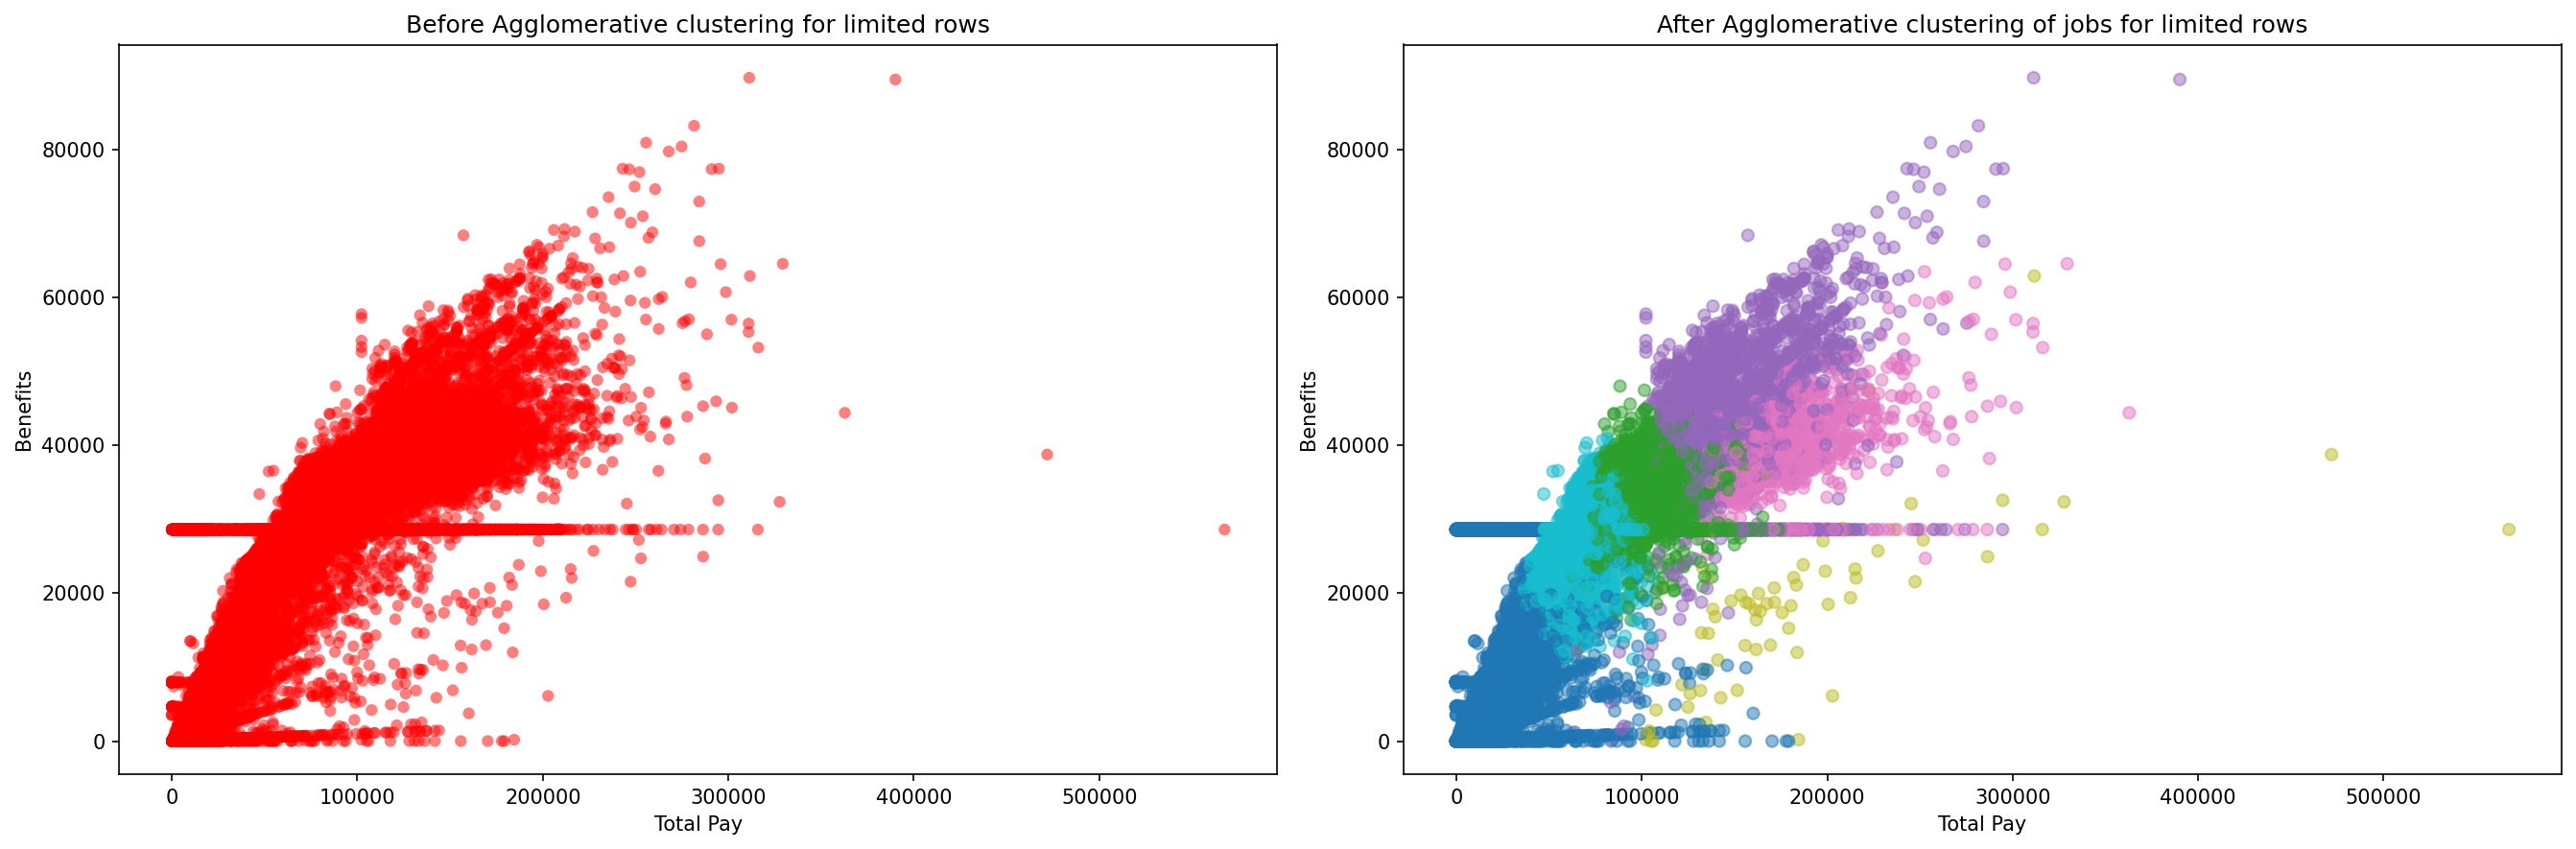

In [40]:
#Hierarchical with agglomerative clustering for limited rows (5000)
cluster_jobs_agglomerative_limited = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
df_limited['clustering_agglomerative_limited'] = cluster_jobs_agglomerative_limited.fit_predict(jobs_scaled_limited)

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Agglomerative clustering
ax[0].scatter(df_limited[x_axis], df_limited[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Agglomerative clustering for limited rows")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Agglomerative clustering for jobs
ax[1].scatter(df_limited[x_axis], df_limited[y_axis], c=df_limited['clustering_agglomerative_limited'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Agglomerative clustering of jobs for limited rows")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

### 2.2 Spectral clustering

In [41]:
#Spectral clustering for 6 columns ('Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits')
cluster_jobs_spectral = SpectralClustering(6, affinity='nearest_neighbors', random_state=seed).fit_predict(jobs_scaled)
df['clustering_spectral'] = cluster_jobs_spectral

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Spectral clustering
ax[0].scatter(df[x_axis], df[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Spectral clustering")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Spectral clustering for jobs
ax[1].scatter(df[x_axis], df[y_axis], c=df['clustering_spectral'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Spectral clustering of jobs")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

#The spectral clustering method keeps running for a very long time in difference to K-Means clustering

'\ncluster_jobs_spectral = SpectralClustering(6, affinity=\'nearest_neighbors\', random_state=seed).fit_predict(jobs_scaled)\ndf[\'clustering_spectral\'] = cluster_jobs_spectral\n\n#creating plots next to each other to similarise the before and after clustering\nfig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)\n\n#the left plot shows data before Spectral clustering\nax[0].scatter(df[x_axis], df[y_axis], edgecolor=\'none\', facecolor=\'red\', s=35, alpha=0.5)\nax[0].set_title("Before Spectral clustering")\nax[0].set_xlabel(x_axis)\nax[0].set_ylabel(y_axis)\n\n#the right plot shows data after Spectral clustering for jobs\nax[1].scatter(df[x_axis], df[y_axis], c=df[\'clustering_spectral\'], cmap=\'tab10\', s=35, alpha=0.5)\nax[1].set_title("After Spectral clustering of jobs")\nax[1].set_xlabel(x_axis)\nax[1].set_ylabel(y_axis)\n\nplt.tight_layout()\nplt.show()\n'

### 3.2 Hierarchical with agglomerative clustering

In [42]:
#Hierarchical with agglomerative clustering for 6 columns ('Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay & Benefits')
cluster_jobs_agglomerative = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward').fit_predict(jobs_scaled)
df['clustering_agglomerative'] = cluster_jobs_agglomerative

#creating plots next to each other to similarise the before and after clustering
fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)

#the left plot shows data before Agglomerative clustering
ax[0].scatter(df[x_axis], df[y_axis], edgecolor='none', facecolor='red', s=35, alpha=0.5)
ax[0].set_title("Before Agglomerative clustering")
ax[0].set_xlabel(x_axis)
ax[0].set_ylabel(y_axis)

#the right plot shows data after Agglomerative clustering for jobs
ax[1].scatter(df[x_axis], df[y_axis], c=df['clustering_agglomerative'], cmap='tab10', s=35, alpha=0.5)
ax[1].set_title("After Agglomerative clustering of jobs")
ax[1].set_xlabel(x_axis)
ax[1].set_ylabel(y_axis)

plt.tight_layout()
plt.show()

#The Agglomerative clustering kept using too much RAM so it gave errors

'\ncluster_jobs_agglomerative = AgglomerativeClustering(n_clusters=6, metric=\'euclidean\', linkage=\'ward\').fit_predict(jobs_scaled)\ndf[\'clustering_agglomerative\'] = cluster_jobs_agglomerative\n\n#creating plots next to each other to similarise the before and after clustering\nfig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=150)\n\n#the left plot shows data before Agglomerative clustering\nax[0].scatter(df[x_axis], df[y_axis], edgecolor=\'none\', facecolor=\'red\', s=35, alpha=0.5)\nax[0].set_title("Before Agglomerative clustering")\nax[0].set_xlabel(x_axis)\nax[0].set_ylabel(y_axis)\n\n#the right plot shows data after Agglomerative clustering for jobs\nax[1].scatter(df[x_axis], df[y_axis], c=df[\'clustering_agglomerative\'], cmap=\'tab10\', s=35, alpha=0.5)\nax[1].set_title("After Agglomerative clustering of jobs")\nax[1].set_xlabel(x_axis)\nax[1].set_ylabel(y_axis)\n\nplt.tight_layout()\nplt.show()\n\n#The Agglomerative clustering kept using too much RAM so it gave errors\n'